<a href="https://colab.research.google.com/github/russiemaster/Pluto/blob/main/ML_project_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Introduction to SVM**

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.


2. Necessary Imports

In [ ]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
# We want our plots to appear in the notebook
%matplotlib inline
## Models


**3. About the Cancer Data**

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)


In [ ]:
df=pd.read_csv('/content/cell_samples.csv')

In [ ]:
df.shape
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2




5. **Distribution of Classes**



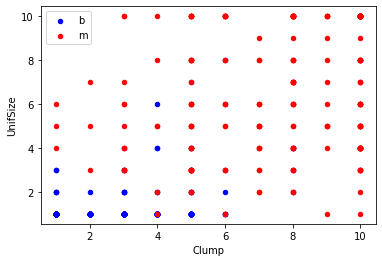

In [ ]:
b_df=df[df['Class']==2][0:200]
m_df=df[df['Class']==4][0:200]

axes=b_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='b')
m_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='m',ax=axes)



**6.**   **Identifying unwanted rows**



In [ ]:
df.dtypes

df= df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
#convert all values to numeriv type

df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

7.   **Remove unwanted columns**

In [ ]:
df.columns
#removing class and id column
feature_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit',]]
#df has 100 rows 11 columns
#picked 9 columns

#independent variable
X=np.asarray(feature_df)

#dependent variable
y=np.asarray(df['Class'])

y[0:5]

array([2, 2, 2, 2, 2])

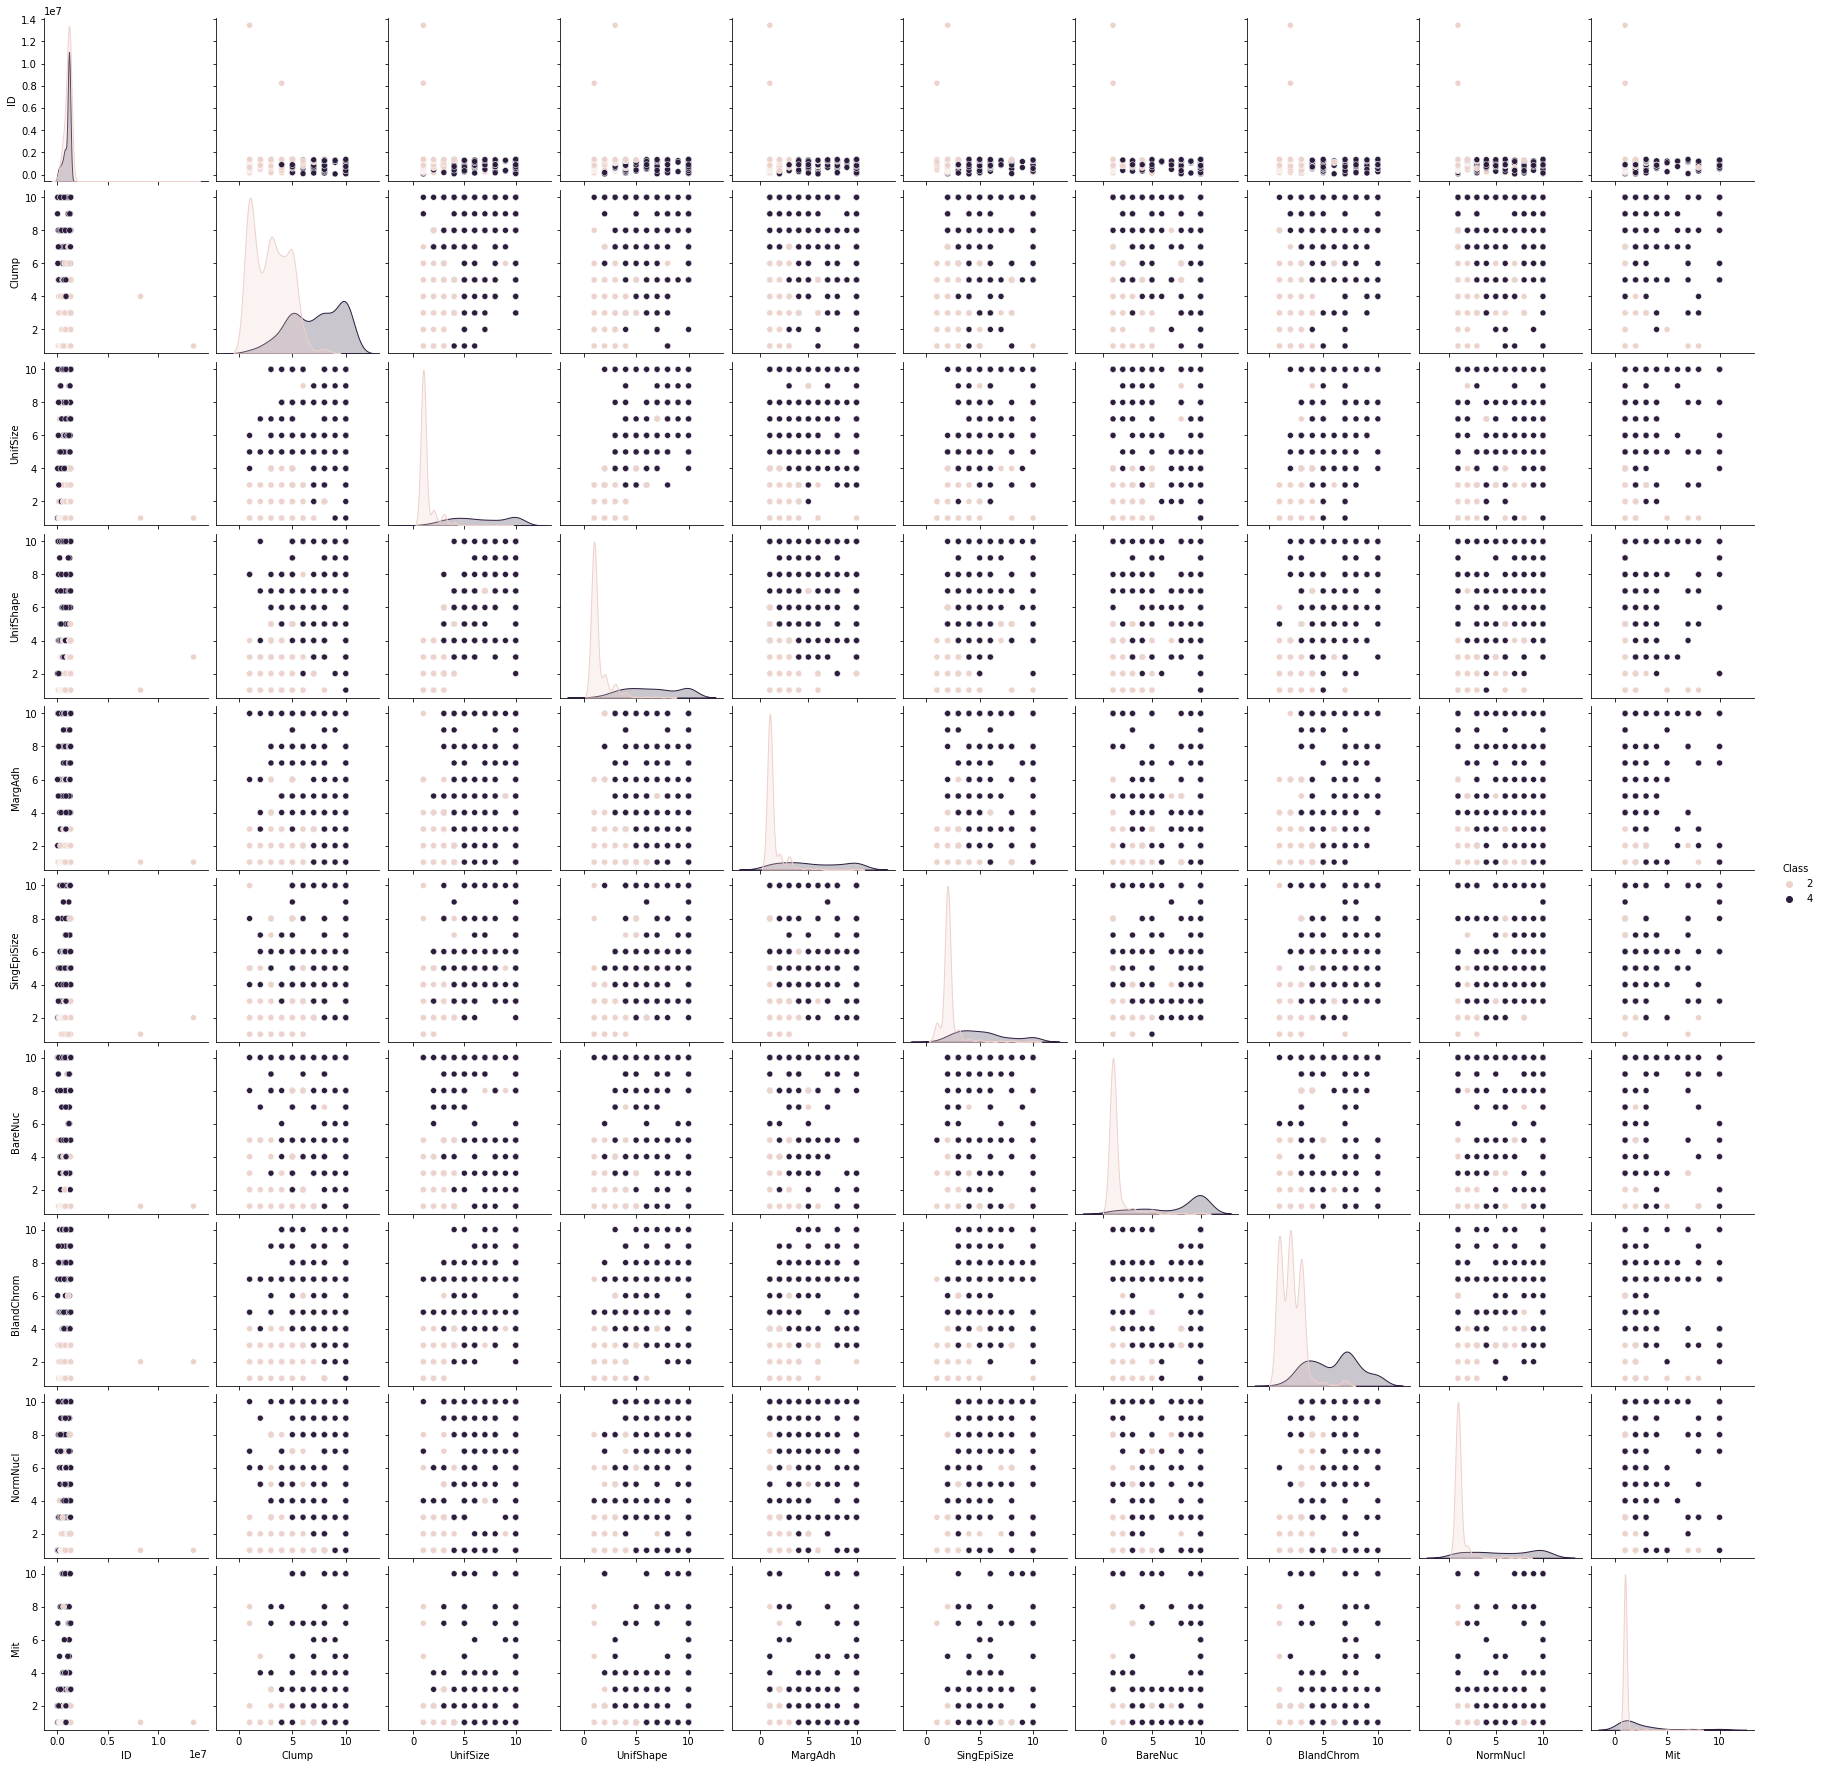

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='Class')

8. **Divide the data as Train/test dataset**

In [ ]:
#...
#df--> Train/Test
#Train(X.y) ##X itself is a 2D array, y is 1D
#Test(X.y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4) #used to generate other random numbers to pick rows

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(137, 9)
(546, 9)
(137,)
(546,)


In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear', gamma='auto', C=2) 
#SVC method which which accepts kernel 
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)


10. **Evaluation (Results)**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict,digits=4))


              precision    recall  f1-score   support

           2     1.0000    0.9444    0.9714        90
           4     0.9038    1.0000    0.9495        47

    accuracy                         0.9635       137
   macro avg     0.9519    0.9722    0.9605       137
weighted avg     0.9670    0.9635    0.9639       137



**Using KNN**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(confusion_matrix(y_test,pred))

[[87  3]
 [ 0 47]]


In [ ]:
print(classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           2     1.0000    0.9667    0.9831        90
           4     0.9400    1.0000    0.9691        47

    accuracy                         0.9781       137
   macro avg     0.9700    0.9833    0.9761       137
weighted avg     0.9794    0.9781    0.9783       137



In [ ]:
accuracy_rate=[]
#searching for k values
for i in range (1,40):

    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,feature_df,df['Class'],cv=10)
    accuracy_rate.append(score.mean())



In [ ]:
error_rate=[]
#searching for k values
for j in range (1,40):

    knn=KNeighborsClassifier(n_neighbors=j)
    score=cross_val_score(knn,feature_df,df['Class'],cv=10)
    error_rate.append(1-score.mean())
    

Text(0, 0.5, 'Error Rate')

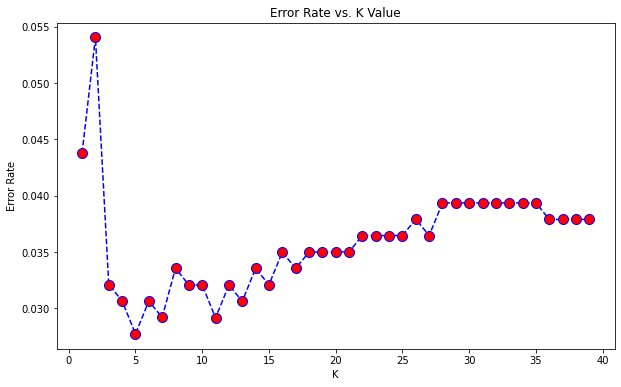

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
        

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)

pred1=knn1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           2     1.0000    0.9556    0.9773        90
           4     0.9216    1.0000    0.9592        47

    accuracy                         0.9708       137
   macro avg     0.9608    0.9778    0.9682       137
weighted avg     0.9731    0.9708    0.9711       137



In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
 # create regressor object
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
classifier_rf.oob_score_

0.9743589743589743

Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9780619364534135

In [ ]:

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

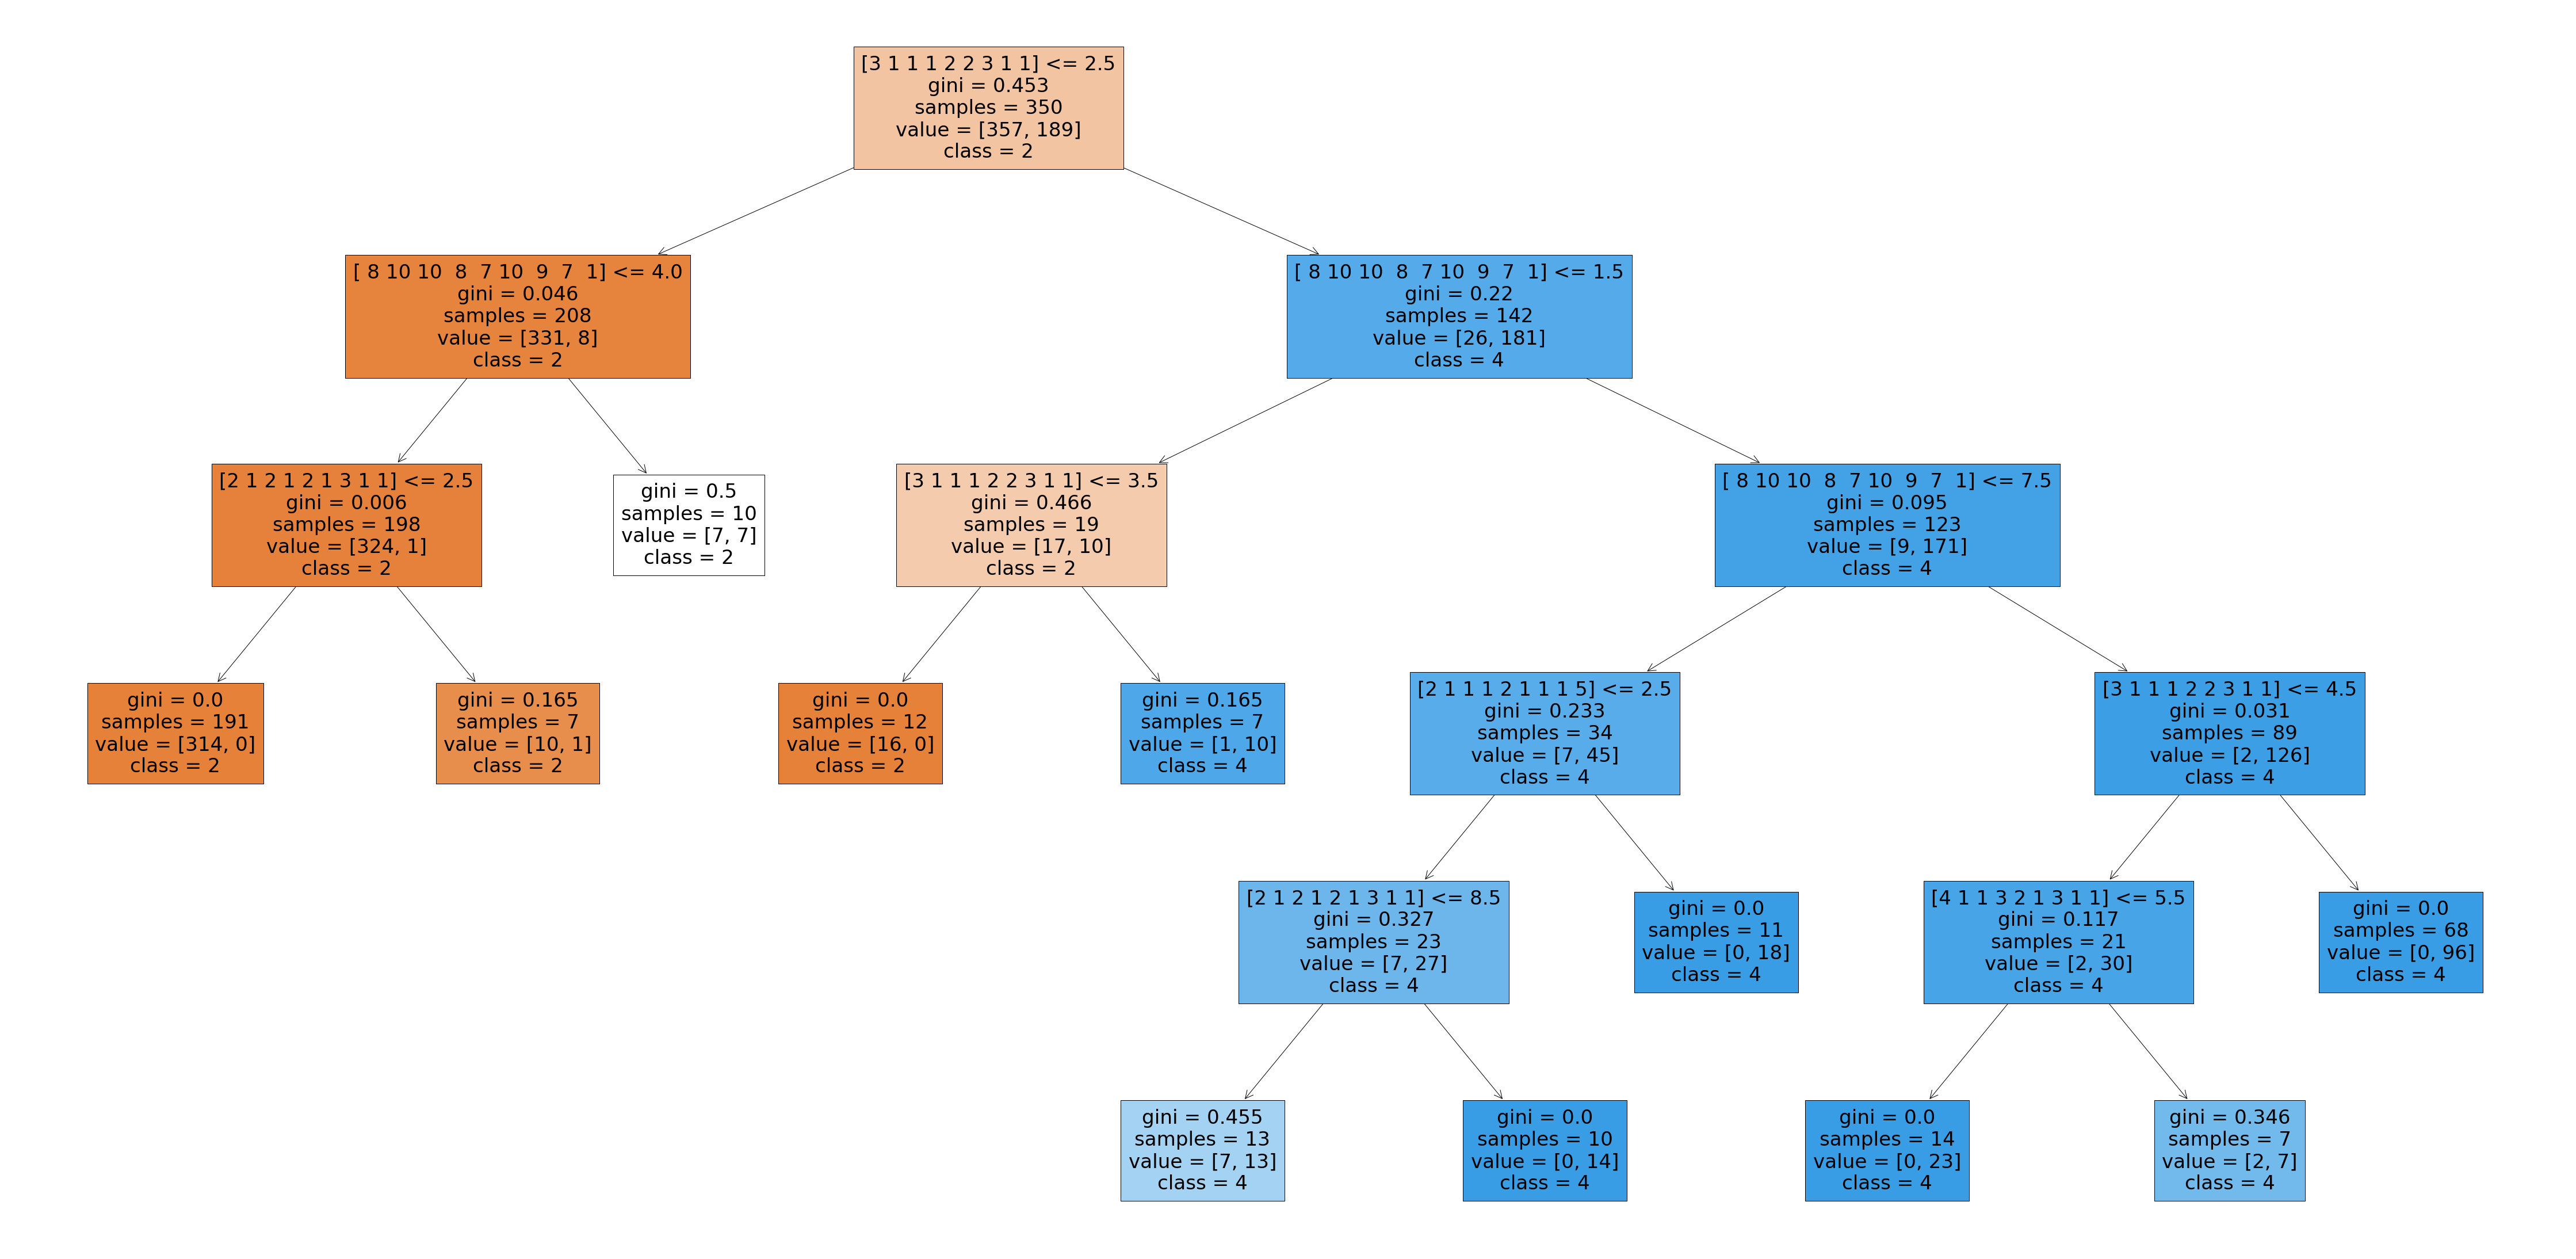

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X,class_names=['2', "4"],filled=True);

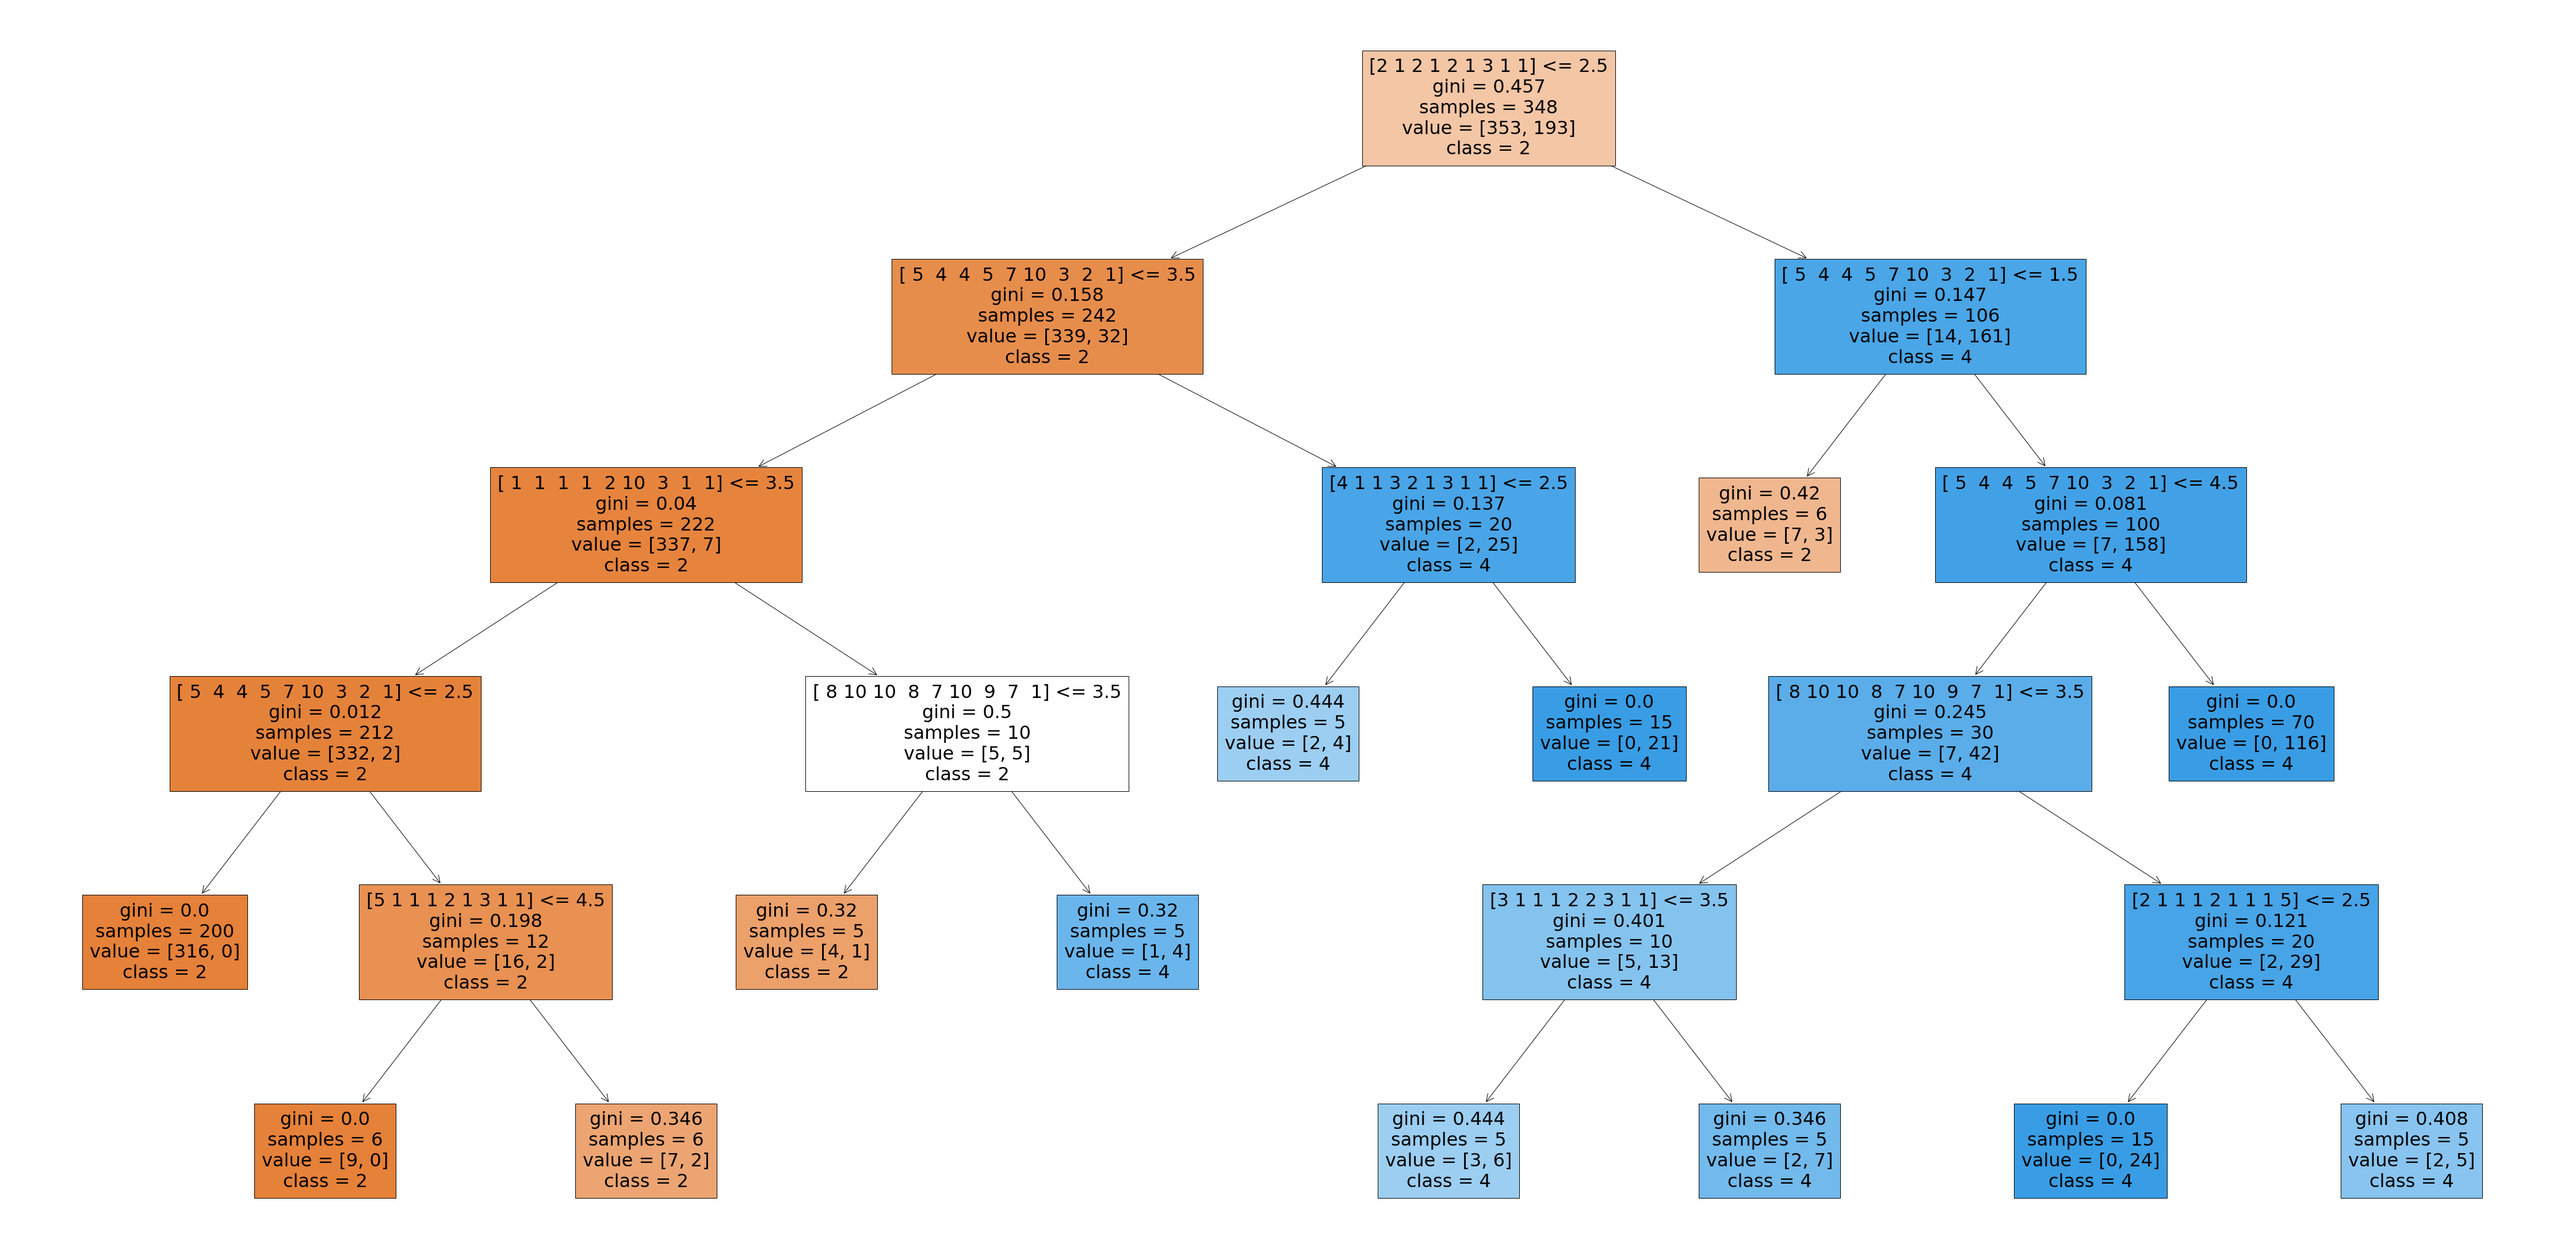

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X,class_names=['2', "4"],filled=True);